In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

### Задание ...

In [3]:
# Исходные данные
X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91]])
X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 45],
       [85, 70],
       [71, 80],
       [60, 78],
       [55, 52],
       [80, 91]])

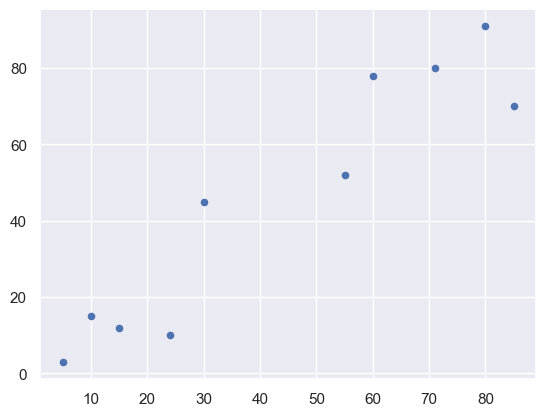

In [4]:
plt.scatter(X[:,0], X[:, 1], s=20)

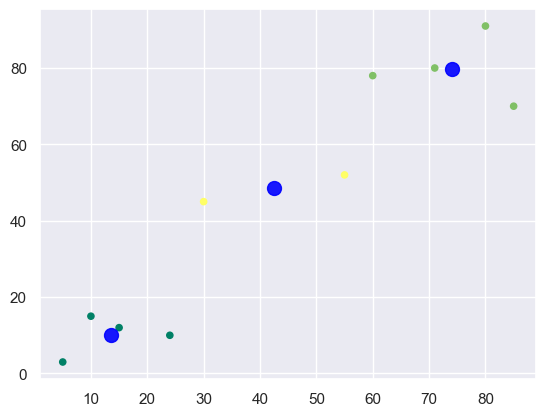

array([0, 0, 0, 0, 2, 1, 1, 1, 2, 1])

In [5]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
y_kmeans3 = kmeans3.predict(X)

centers3 = kmeans3.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans3, s=20, cmap="summer")
plt.scatter(centers3[:, 0], centers3[:, 1], c='blue', s=100, alpha=0.9)
plt.show()
y_kmeans3

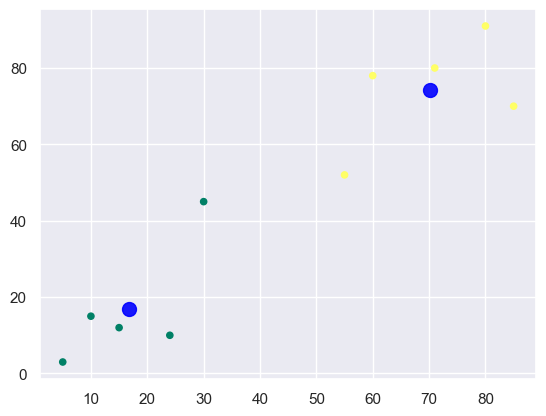

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)

centers2 = kmeans2.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans2, s=20, cmap="summer")
plt.scatter(centers2[:, 0], centers2[:, 1], c='blue', s=100, alpha=0.9)
plt.show()
y_kmeans2

### Задание ...

In [7]:
data = sns.load_dataset('iris')
data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


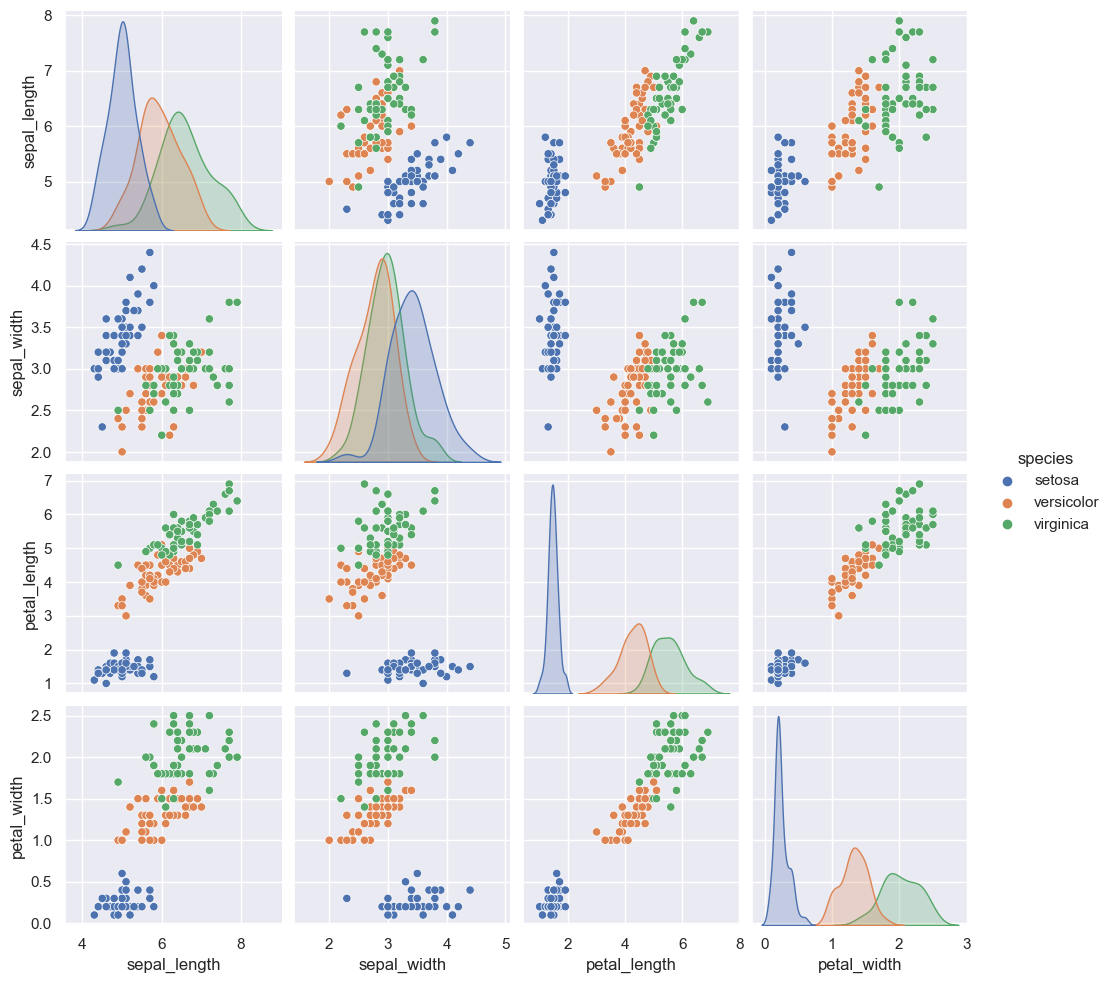

In [8]:
sns.pairplot(data, hue="species")

In [9]:
x = data.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y = data.species
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

centers = kmeans.cluster_centers_
y_kmeans

# versicolor - 0
# setosa - 1
# virginica - 2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
data["predict"] = y_kmeans

In [14]:
data.loc[(data.predict == 1), 'predict'] = 'versicolor'
data.loc[(data.predict == 0), 'predict'] = 'setosa'
data.loc[(data.predict == 2), 'predict'] = 'virginica'

# Количество неверных предсказаний
data.loc[(data.predict.values != data.species.values), ('predict', 'species')].count()

predict    114
species    114
dtype: int64

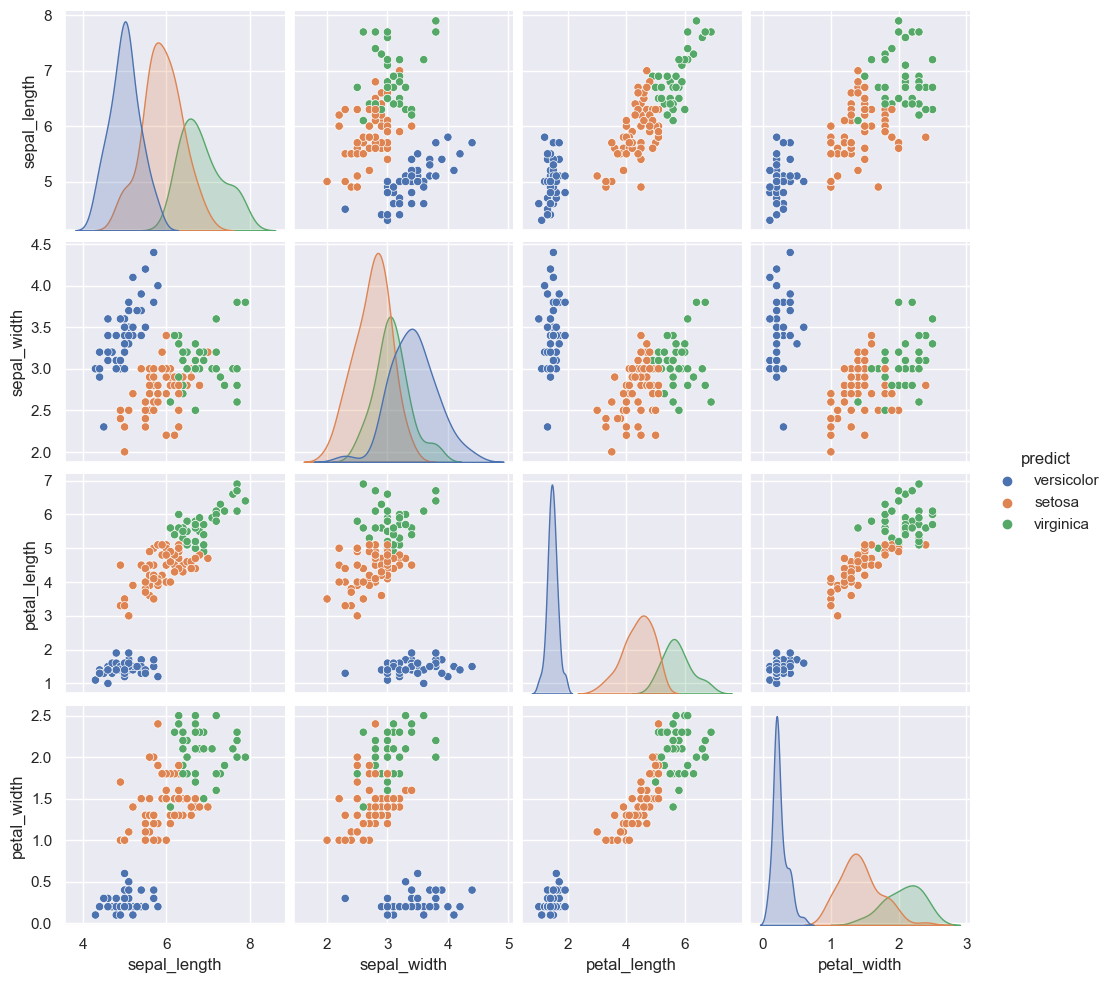

In [15]:
# График по предсказанным значениям 
sns.pairplot(data, hue="predict")

In [16]:
# Найдем accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data.predict, data.species)

0.24

In [17]:
data["predict"].value_counts()

setosa        62
versicolor    50
virginica     38
Name: predict, dtype: int64

### Задание ...

In [19]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# Проведем кластеризацию по длине и ширине лепестков ирисов
x = data[["petal_length", "petal_width"]]
# y = data["species"]

<Figure size 5040x2160 with 0 Axes>

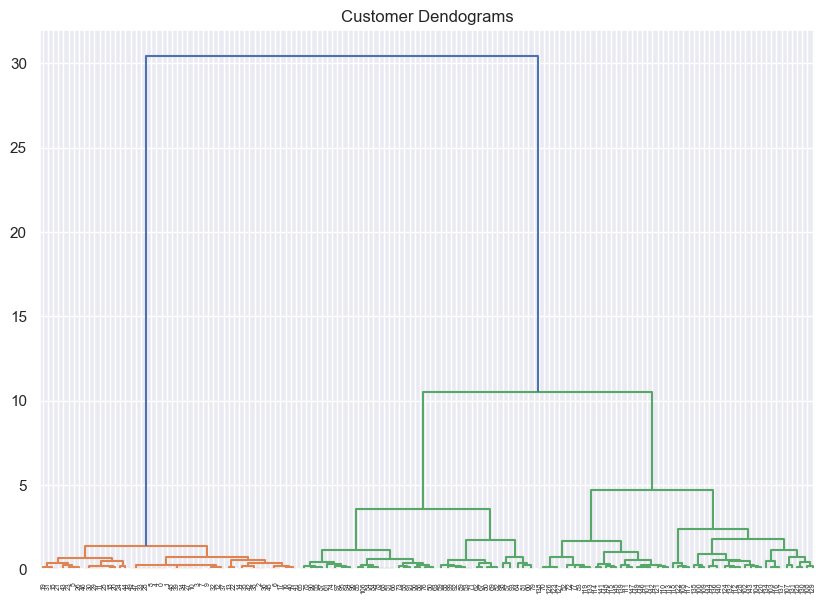

In [21]:
# Построим дендрограмму
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward')
prediction = cluster.fit_predict(x)

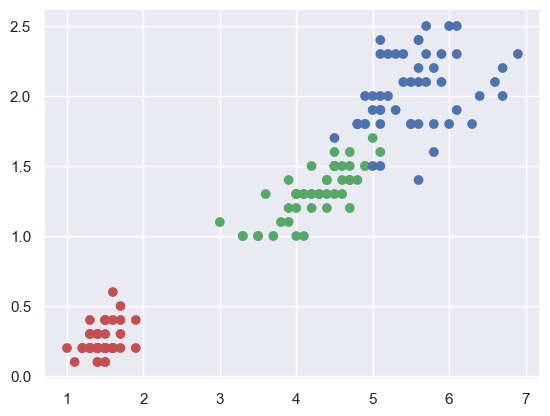

In [23]:
# Реальные значения
y = data['species']

color_dic_y = {'setosa' : 'r',
               'versicolor' : 'g',
               'virginica' : 'b'}

y_colors = [color_dic_y[a] for a in y]

ax1 = plt.scatter(x.petal_length, x.petal_width, c=y_colors)

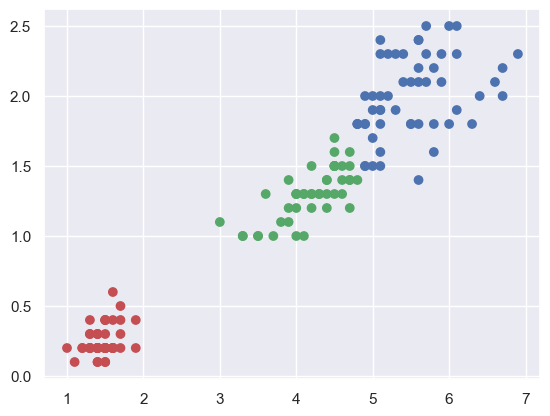

In [24]:
# Результаты кластеризации
colors = {1 : 'r',
          2 : 'g',
          0 : 'b'}

prediction_colors = [colors[a] for a in prediction]
plt.scatter(x.petal_length, x.petal_width, c=prediction_colors)

In [25]:
# Найдем accuracy
from sklearn.metrics import accuracy_score
accuracy_score(prediction_colors, y_colors)

0.96